In [18]:
import requests
import shutil

rs = requests.session()
res = rs.get('https://fbfh.trade.gov.tw/rich/text/common/code_98/CheckImageCode.aspx', stream=True, verify=False)
with open('check.png','wb') as f:
    shutil.copyfileobj(res.raw, f)



/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [19]:
%ls 

Auto_Crawler_0425.ipynb           HTTP ( GET, POST ).ipynb
breaking_into captcha.ipynb       jake-gyllenhaal.png
check.png                         LargitData.ipynb
Date_ChromeDriver_20170427.ipynb  lib/
download_picture.ipynb            Python_Command_0420.ipynb
html.txt                          Trump_Speech.ipynb


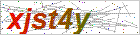

In [20]:
from IPython.display import Image
Image('./check.png')

In [24]:
# from toolbox import gen_headers

from bs4 import BeautifulSoup

data_raw = """queryType:C
uni_number:
chinese_name:
basic_select:3
english_name:taipei
owner:
product:
ccc_select:1
product_name:
pname_select:1
txtCheckCode:1"""
data = gen_header(data_raw)
print(data)
data['txtCheckCode'] = 'xjst4y'

with open('./html.txt', 'w') as f:
    for i in range(1,12):
        host = 'https://fbfh.trade.gov.tw/rich/text/fbj/asp/fbje140L.asp'
        url = host + '?ScrollAction=Page '+ str(i) + '&ban_no=&txtCheckCode=w38cue&isCA='
        res = rs.get( host, data=data, stream=True, verify=False)

        res.encoding = 'utf-8'
        soup = BeautifulSoup(res.text, 'lxml')
        com = soup.select('.td2bg1.arWebFont')
        print(soup.prettify())
        f.write(soup.prettify())
com

{'queryType': 'C', 'uni_number': '', 'chinese_name': '', 'basic_select': '3', 'english_name': 'taipei', 'owner': '', 'product': '', 'ccc_select': '1', 'product_name': '', 'pname_select': '1', 'txtCheckCode': '1'}


/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning

[<td class="td2bg1 arWebFont" style="text-align:center;">
 			日商永達榮股份有限公司台北分公司
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			朱燕鳳
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			台北亞伯拉罕管理顧問有限公司
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			郭沅櫂
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			台北聚原有限公司
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			郭敬賢
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			日商阿克斯特股份有限公司台北分公司
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			土江和宏
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			台灣類比科技股份有限公司台北分公司
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			劉紹宗
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			聯發生物科技股份有限公司台北分公司
 		</td>, <td class="td2bg1 arWebFont" style="text-align:center;">
 			劉健誼
 		</td>, <td class="td2bg1 arWebFont

In [15]:
!pip install shutil


  Could not find a version that satisfies the requirement shutil (from versions: )
No matching distribution found for shutil


In [14]:
def gen_header(header_str):
    """This function generates a header_dict from Chrome dev tool for requests library
    
    :param header_str: The header string copied from Chrome developer tool.
    :type header_str: str
    :returns: header dictionary
    """
    header_dict = {}
    rows = header_str.split('\n')
    for row in rows:
        kv_list = row.split(":") # 把每一行用: split()開

        # kv_list = ['key1', 'https', '//ianchenhq.com']
        key = kv_list[0] 
        val = ':'.join(kv_list[1:]) # 再用:把1到結尾的element重新組合起來 -> https://ianchenhq.com
        header_dict[key] = val
    return header_dict